In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
# lets make Genre numerical. You can also make it dummy
data['Genre'] = data.Genre.map({'Female':0, 'Male':1})
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
data = data.drop('CustomerID', axis=1)

In [4]:
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


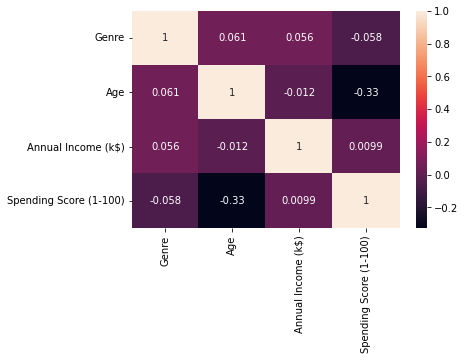

In [5]:
#Visualiztion
sb.heatmap(data.corr(), annot = True)
plt.show()

Empty DataFrame
Columns: [Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []
Genre
0    112
1     88
Name: Spending Score (1-100), dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


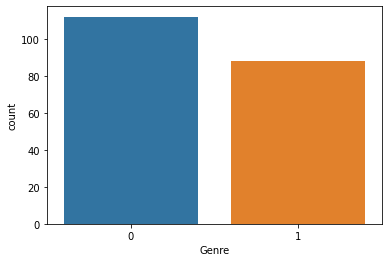

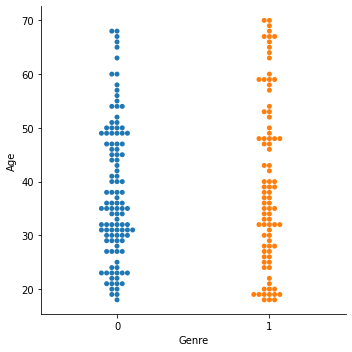

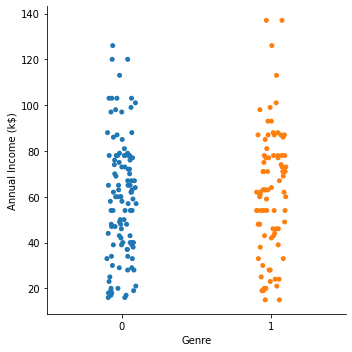

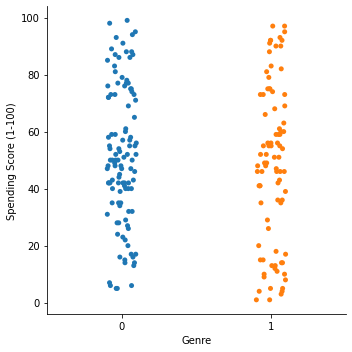

In [6]:
#NOW COMPARE BETWEEN EVERY COLUMNS
#Gender
print(data[data['Genre'].isna() == True])
print(data.groupby('Genre').count()['Spending Score (1-100)'])
sb.countplot(data['Genre'], data = data)
sb.catplot(x="Genre", y="Age",kind = 'swarm', data=data)
sb.catplot(x = "Genre", y = "Annual Income (k$)",data = data)
sb.catplot(x = "Genre", y = "Spending Score (1-100)", data = data)

Empty DataFrame
Columns: [Genre, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


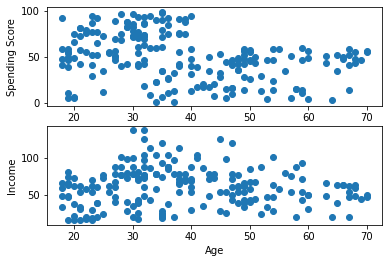

In [7]:
#AGE
print(data[data['Age'].isna() == True])
plt.subplot(2, 1, 1)
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel('Spending Score')
plt.subplot(2, 1, 2)
plt.scatter(data['Age'], data['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel('Income')
plt.show()

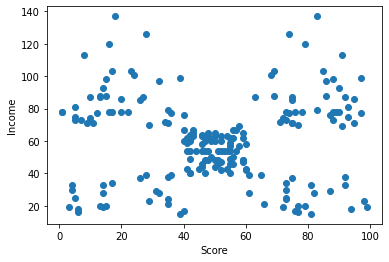

In [8]:
#INCOME AND SCORE
plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'])
plt.xlabel("Score")
plt.ylabel('Income')
plt.show()

In [9]:
y = data['Spending Score (1-100)']
data = data.drop('Spending Score (1-100)', axis=1)
X = np.array(data)
Y = np.array(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
K = 3
def random_intialize(K, X):
    m = len(X)
    idx = []
    for i in range(K):
        idx.append(X[i])
    idx = np.array(idx)
    return idx
mu = random_intialize(K, X)
print(mu)

[[ 1 19 15]
 [ 1 21 15]
 [ 0 20 16]]


In [12]:
def dist(a,b):
    return np.linalg.norm(a-b, axis=0)
def cost_fuction(X, mu):
    #for point in X:
    point = X
    distances = []
    for index in range(len(mu)):
        distances.append(dist(point,mu[index]))
    return distances
def cluster_assign(X, mu):
    classes = {}
    for j in range(len(mu)):
        classes[j] = []
    for point in X:
        distances = cost_fuction(point, mu)
        cluster_index = distances.index(min(distances))
        classes[cluster_index].append(point)
    return classes
def move_centroid(mu, X, classes):
    for cluster_index in classes:
        mu[cluster_index] = np.average(classes[cluster_index], axis = 0)
    return mu

In [13]:
for x in range(0,501): 
    c = cluster_assign(X, mu)
    mu = move_centroid(mu, X, c)

In [14]:
print(mu)

[[ 0 27 31]
 [ 0 54 49]
 [ 0 34 82]]


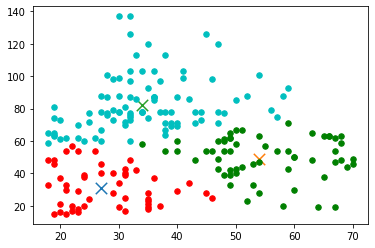

In [15]:
colors = 10*["r", "g", "c", "b", "k"]

for m in range(len(mu)):
    plt.scatter(mu[m][1], mu[m][2],marker = "x", s = 130)
for ca in c:
    color = colors[ca]
    for f in c[ca]:
        plt.scatter(f[1], f[2], color = color, s = 30)

    